# Ejercicios de Procesamiento Digital de Imágenes

## Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado.

b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

In [1]:
import numpy as np
#numpy es para matrices
import cv2
from cv2 import imread
#cv2 es para vision por computador y procesamiento de imagenes
import matplotlib.pyplot as plt

In [2]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/140075.jpg

--2025-04-22 13:30:10--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/140075.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33618 (33K) [image/jpeg]
Saving to: ‘140075.jpg’

140075.jpg          100%[===================>]  32.83K  --.-KB/s    in 0.02s   

2025-04-22 13:30:10 (1.68 MB/s) - ‘140075.jpg’ saved [33618/33618]



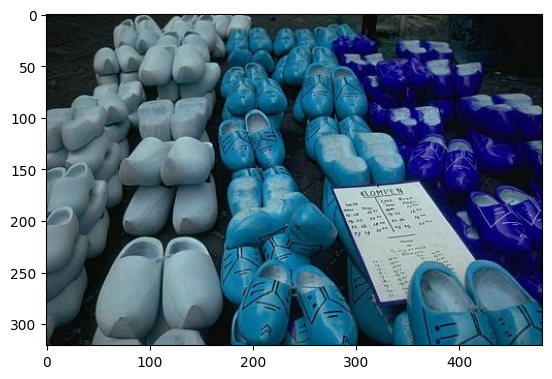

In [3]:
img= imread('140075.jpg')
plt.imshow(img)
plt.show()

Si observamos la imagen original vemos que los colores estan cambiados, donde habia rojo hay azul y donde habia amarillo hay celeste. Esto se debe a que openCV trabaja con el canal RGB invertido, es decir, BGR.

In [4]:
def data_img(img):
  print('tamaño = ',img.shape)
  print('Max = ', np.max(img))
  print('Min = ',np.min(img))

data_img(img)

tamaño =  (321, 481, 3)
Max =  255
Min =  0


El 3 representa es un bgr osea tiene 3 dimensiones de color.
321 es el alto y 481 es el ancho. Max y Min son la intensidad del color.

Vamos a ver ahora los canales de color por separado

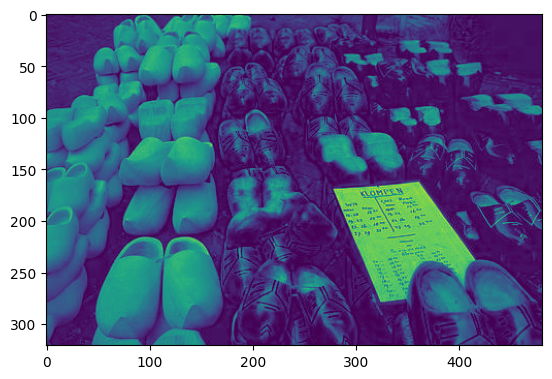

In [5]:
img_only_0=img[:,:,0]
plt.imshow(img_only_0)
plt.show()
#extrae el azul

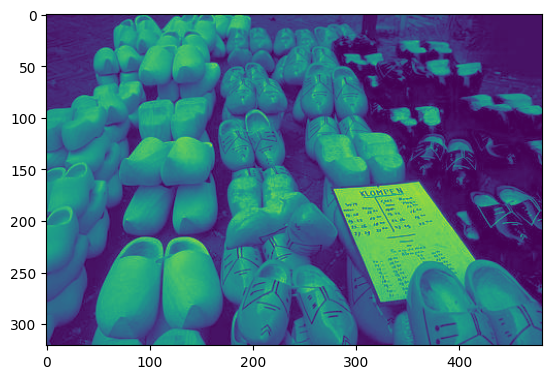

In [6]:
img_only_1=img[:,:,1]
plt.imshow(img_only_1)
plt.show()
#extrae el verde

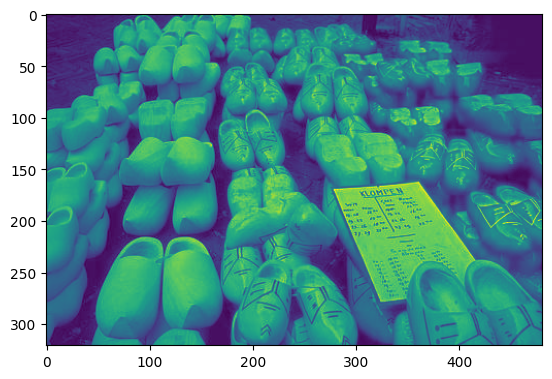

In [7]:
img_only_2=img[:,:,2]
plt.imshow(img_only_2)
plt.show()
#extrae el rojo

In [8]:
print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {img_only_0.min()}, Valor máximo: {img_only_0.max()}, Promedio: {img_only_0.mean():.2f}")
print("-----------------------------------------------------------------------------------")
print("Estadísticas del canal Verde:")
print(f"Valor mínimo: {img_only_1.min()}, Valor máximo: {img_only_1.max()}, Promedio: {img_only_1.mean():.2f}")
print("-----------------------------------------------------------------------------------")
print("Estadísticas del canal Rojo:")
print(f"Valor mínimo: {img_only_2.min()}, Valor máximo: {img_only_2.max()}, Promedio: {img_only_2.mean():.2f}")

Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 237, Promedio: 56.38
-----------------------------------------------------------------------------------
Estadísticas del canal Verde:
Valor mínimo: 0, Valor máximo: 255, Promedio: 86.62
-----------------------------------------------------------------------------------
Estadísticas del canal Rojo:
Valor mínimo: 0, Valor máximo: 255, Promedio: 109.95


Podemos observar que efectivamente hay predominancia del color rojo en la composicion de la imagen.

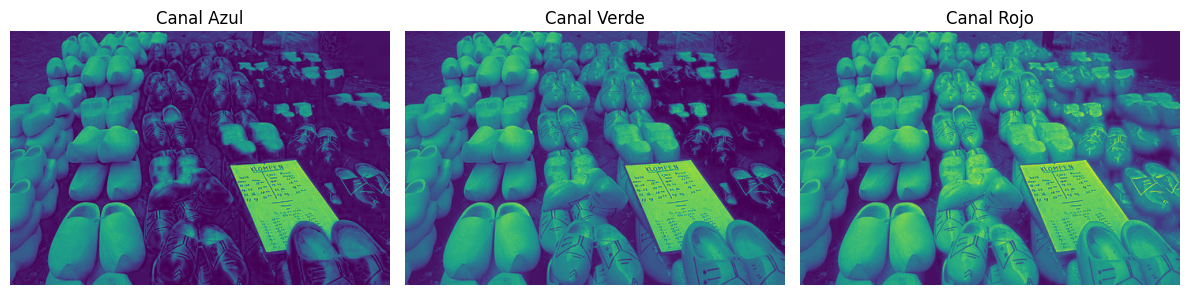

In [9]:
# Nombres y canales
titulos = ['Azul', 'Verde', 'Rojo']
canales = [img[:, :, i] for i in range(3)]  # 0: Azul, 1: Verde, 2: Rojo

# Mostrar en una fila
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(canales[i])
    plt.title(f'Canal {titulos[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


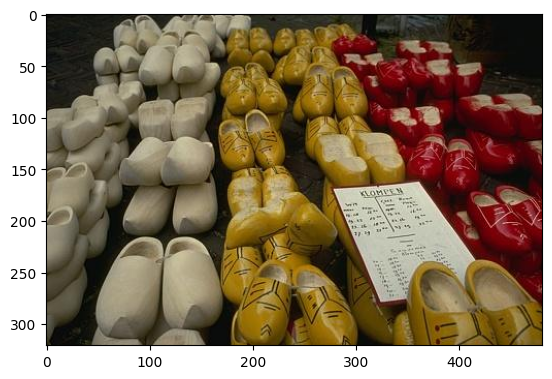

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cnvierto a RGB para corroborrar
plt.imshow(img_rgb)
plt.show()

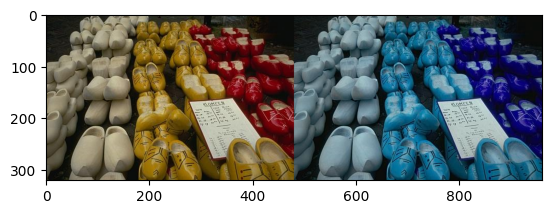

In [11]:
ver_juntas= np.hstack((img_rgb, img))
plt.imshow(ver_juntas)

Podemos ver claramente como en la imagen cargada con openCV (imagen de la derecha) lo que aparece como rojo en la imagen original se convierte en azul. Esto se debe a que openCV por defecto invierte los canales de color de RGB Red-Green-Blue(utilizado de manera estándar) por BGR Blue-Green-Red.

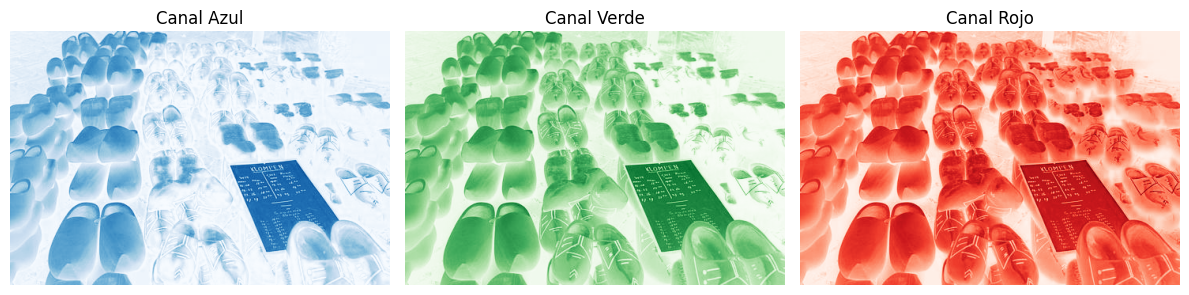

In [45]:
# Lista de imágenes, títulos y colormaps
imagenes = [img_only_0, img_only_1, img_only_2]
titulos = ['Canal Azul', 'Canal Verde', 'Canal Rojo']
colormaps = ['Blues', 'Greens', 'Reds']  # Mapas de color que simulan azul, verde y rojo

plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(imagenes[i], cmap=colormaps[i])  # Usamos el colormap correspondiente
    plt.title(titulos[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


## Ejercicio 2: Muestreo y Cuantización

a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.

b) Para cada caso, calcular:

*   El nuevo tamaño de la imagen
*   El porcentaje de reducción de datos

c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256).

d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

In [12]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/113016.jpg

--2025-04-22 13:30:15--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/113016.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39333 (38K) [image/jpeg]
Saving to: ‘113016.jpg’

113016.jpg          100%[===================>]  38.41K  --.-KB/s    in 0.02s   

2025-04-22 13:30:15 (2.00 MB/s) - ‘113016.jpg’ saved [39333/39333]



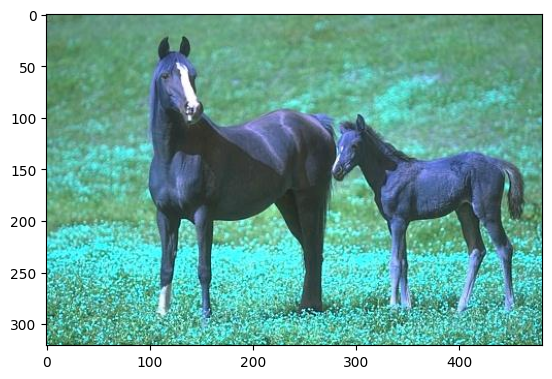

In [13]:
img2= imread('113016.jpg')
plt.imshow(img2)
plt.show()

In [14]:
data_img(img2)

tamaño =  (321, 481, 3)
Max =  255
Min =  0



Para el factor de muestreo 2:
Nuevo tamaño de la imagen: 240 x 160
Porcentaje de reducción de datos: 75.13%

Para el factor de muestreo 4:
Nuevo tamaño de la imagen: 120 x 80
Porcentaje de reducción de datos: 93.78%

Para el factor de muestreo 8:
Nuevo tamaño de la imagen: 60 x 40
Porcentaje de reducción de datos: 98.45%


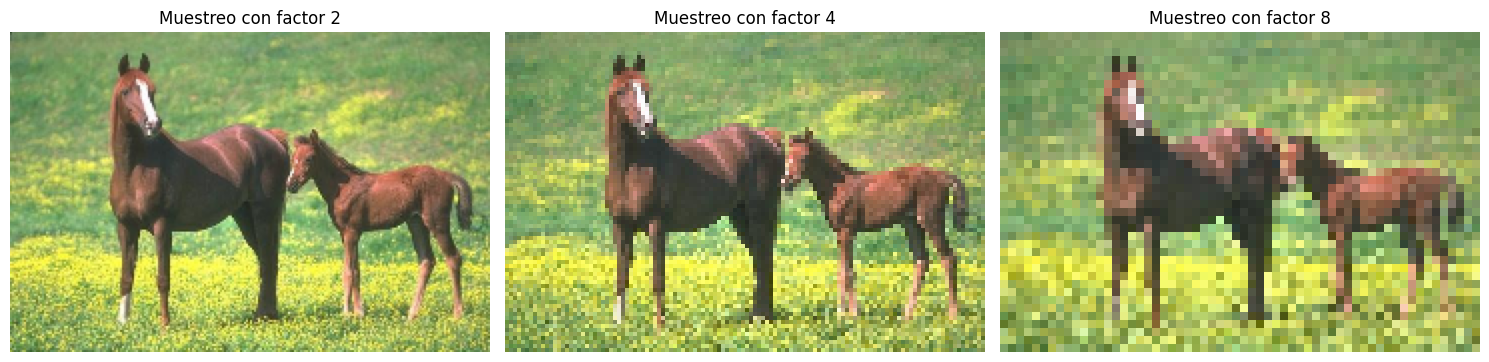

In [15]:
# Convertir la imagen de BGR a RGB (para mostrarla correctamente con matplotlib)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

# Definir factores de muestreo
factores = [2, 4, 8]
imagenes_muestreadas = []

# Obtener dimensiones originales
altura_original, ancho_original = img2.shape[:2]
canales_color = 3  # RGB

# Mostrar resultados
for factor in factores:
    # Calcular nuevo tamaño
    nuevo_ancho = ancho_original // factor
    nueva_altura = altura_original // factor
    img_reducida = cv2.resize(img2_rgb, (nuevo_ancho, nueva_altura))
    imagenes_muestreadas.append(img_reducida)

    # Calcular tamaño original y reducido
    tamano_original = altura_original * ancho_original * canales_color
    tamano_reducido = nueva_altura * nuevo_ancho * canales_color

    # Calcular porcentaje de reducción de datos
    porcentaje_reduccion = (1 - tamano_reducido / tamano_original) * 100

    # Imprimir resultados
    print(f"\nPara el factor de muestreo {factor}:")
    print(f"Nuevo tamaño de la imagen: {nuevo_ancho} x {nueva_altura}")
    print(f"Porcentaje de reducción de datos: {porcentaje_reduccion:.2f}%")

# Mostrar las imágenes con los diferentes factores de muestreo
plt.figure(figsize=(15, 5))

for i, img_muestreada in enumerate(imagenes_muestreadas):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_muestreada)
    plt.title(f'Muestreo con factor {factores[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Como podemos ver con estos resultados cuando aplicamos un factor de 2 estamos tomando sólo 1 pixel de cada 2 filas y 1 pixel de cada 2 columnas, por lo que perdemos un 75% en promedio de informacion ya que por cada bloque de 2 x 2 sólo tomamos uno. Sin embargo la imagen logra entenderse y parecerse mucho a la original.
Lo mismo ocurre para el caso del factor 4 pero aumentando el porcentaje de pérdida de información, ya que ahora de un bloque de 4 x 4 pixeles solo me quedo con uno, conservando solo el 1/16 (6.25% )de la informacion original.
Para el factor 8 sólo conservo el 1.56% de los valores originales por lo que termino obteniendo una imagen muy distorsionada.

### Aplicar cuantizacion

In [16]:
img2_gray = cv2.cvtColor(img2_rgb, cv2.COLOR_BGR2GRAY)

In [17]:
q = 32                  # Factor de cuantización
# Divide por q, redondea hacia abajo y multiplica por q
Z = np.floor(img2_gray/q)*q      # Agrupa valores en intervalos de tamaño q
Z = Z.astype(np.uint8)   # Convierte a enteros 0-255

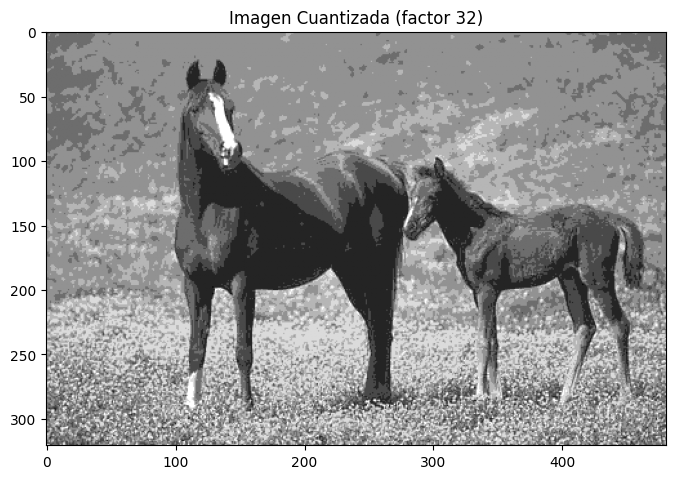

Esta imagen tiene 8 niveles de gris (original: 256)


In [18]:
# Muestra imagen cuantizada
plt.figure(figsize=(8,8))
plt.imshow(Z, cmap='gray')
plt.title(f'Imagen Cuantizada (factor {q})')
plt.show()
print(f'Esta imagen tiene {int(256/q)} niveles de gris (original: 256)')

In [19]:
def cuantizar_y_mostrar(imagen):
    niveles = [32, 64, 128, 256]
    cuantizadas = []

    for q in niveles:
        Z = np.floor(imagen / q) * q
        Z = Z.astype(np.uint8)
        cuantizadas.append(Z)
        niveles_unicos = np.unique(Z)
        print(f'Cuantización con q = {q}: {len(niveles_unicos)} niveles únicos de gris')
        print(f'Niveles: {niveles_unicos}')
        print('-' * 60)

    # Mostrar todas juntas con tamaño más grande
    plt.figure(figsize=(20, 8))
    for i, Z in enumerate(cuantizadas):
        plt.subplot(1, 4, i+1)
        plt.imshow(Z, cmap='gray')
        plt.title(f'q = {niveles[i]}', fontsize=14)
        plt.axis('off')
    plt.suptitle("Cuantización con distintos niveles", fontsize=16)
    plt.show()

Cuantización con q = 32: 8 niveles únicos de gris
Niveles: [  0  32  64  96 128 160 192 224]
------------------------------------------------------------
Cuantización con q = 64: 4 niveles únicos de gris
Niveles: [  0  64 128 192]
------------------------------------------------------------
Cuantización con q = 128: 2 niveles únicos de gris
Niveles: [  0 128]
------------------------------------------------------------
Cuantización con q = 256: 1 niveles únicos de gris
Niveles: [0]
------------------------------------------------------------


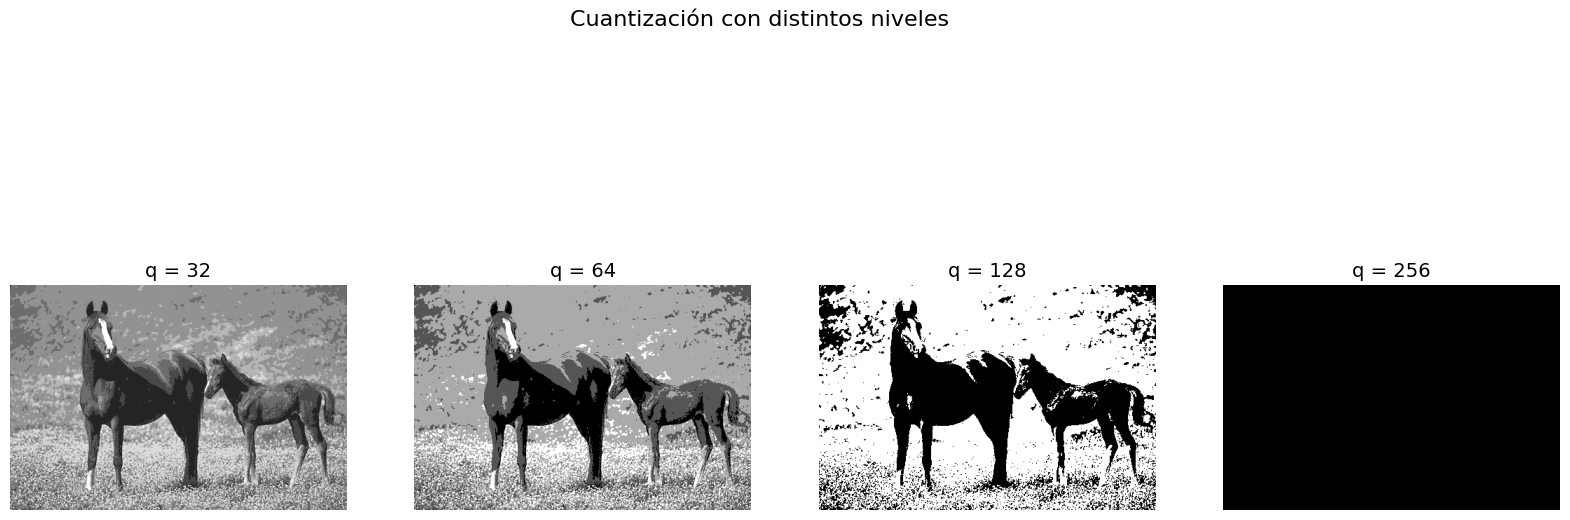

In [20]:
cuantizar_y_mostrar(img2_gray)

Podemos observar que incluso con un valor de q=132 la imagen sigue siendo visible y comprensible. Con q=256  efectivamente no se consigue ver nada ya que solo se queda con un unico nivel de gris.

## Ejercicio 3: Segmentación por Color

Dada una imagen con objetos de diferentes colores:

a) Implementar una segmentación para extraer objetos de un color específico usando umbrales en los canales RGB.

b) Calcular y mostrar el histograma de la imagen en escala de grises.

c) Encontrar las coordenadas del rectángulo que encierra el objeto segmentado.

d) Dibujar los bordes del objeto segmentado en color rojo.

In [21]:
!wget https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/35058.jpg

--2025-04-22 13:30:21--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/bsds/BSDS300/html/images/plain/normal/color/35058.jpg
Resolving www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)... 128.32.244.190
Connecting to www2.eecs.berkeley.edu (www2.eecs.berkeley.edu)|128.32.244.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16113 (16K) [image/jpeg]
Saving to: ‘35058.jpg’

35058.jpg           100%[===================>]  15.74K  --.-KB/s    in 0.02s   

2025-04-22 13:30:22 (827 KB/s) - ‘35058.jpg’ saved [16113/16113]



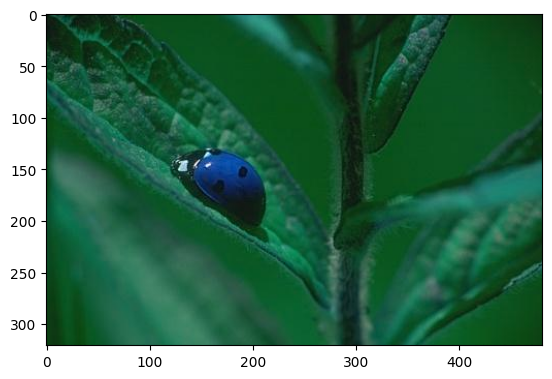

In [22]:
img3= imread('35058.jpg')
plt.imshow(img3)
plt.show()

In [23]:
data_img(img3)

tamaño =  (321, 481, 3)
Max =  255
Min =  0


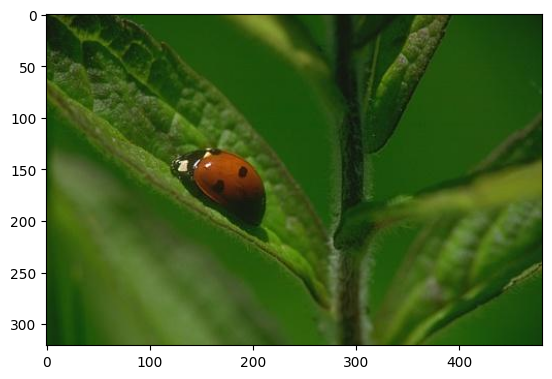

In [24]:
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3_rgb)
plt.show()

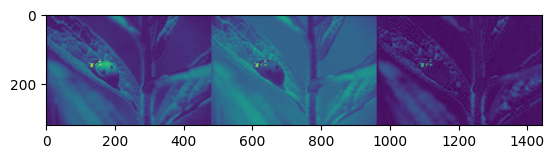

In [25]:
from google.colab.patches import cv2_imshow
rojo = img3_rgb[:,:,0]
verde = img3_rgb[:,:,1]
azul = img3_rgb[:,:,2]
# canales = np.concatenate((rojo,verde,azul),axis=1)
# imagen_rgb = cv2.merge((rojo, verde, azul))
# cv2_imshow(imagen_rgb)
todas= np.hstack((rojo, verde, azul))
plt.imshow(todas)

tamaño =  (321, 481)
Max =  252
Min =  8


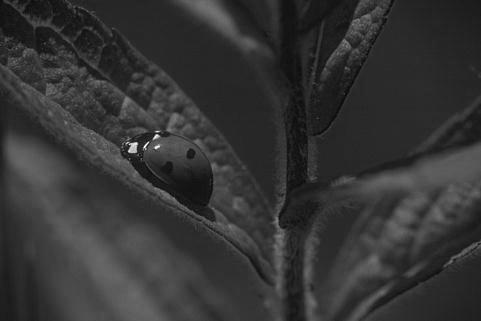

In [26]:
# Conversión a escala de grises
rojo_f = rojo.astype(float)
verde_f = verde.astype(float)
azul_f = azul.astype(float)
# Promedio ponderado
peso = (1/3,1/3,1/3)
#peso = (0.1,0.4,0.5)  # pesos alternativos
gris_f = peso[0]*rojo_f + peso[1]*verde_f + peso[2]*azul_f
gris = gris_f.astype(int)
data_img(gris)
cv2_imshow(gris)
#en la conversion estándar a gris se usan estos valores: 0.2989 * rojo + 0.587 * verde + 0.114 * azul.
#Se basa en la percepción del ojo humano.

In [27]:
# Función para mostrar histograma
def histograma(X):
    (N,M) = X.shape
    n = 256
    h = np.zeros((256,))
    for i in range(N):
        for j in range(M):
            x = X[i,j]
            h[x] = h[x]+1
    plt.plot(range(n),h[0:n])
    plt.title('Histograma')
    plt.xlabel('Valor de pixel')
    plt.ylabel('Frecuencia')
    plt.show()

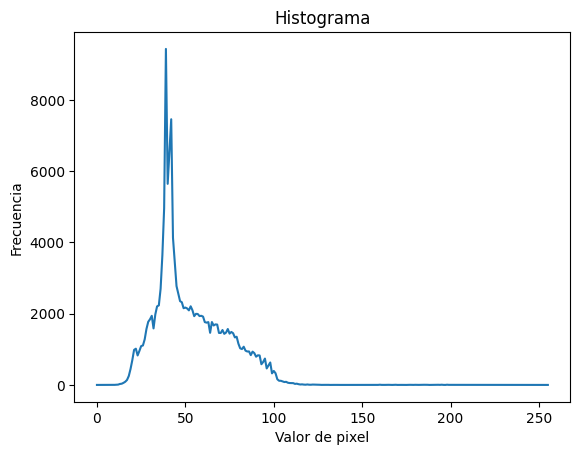

In [28]:
histograma(gris)

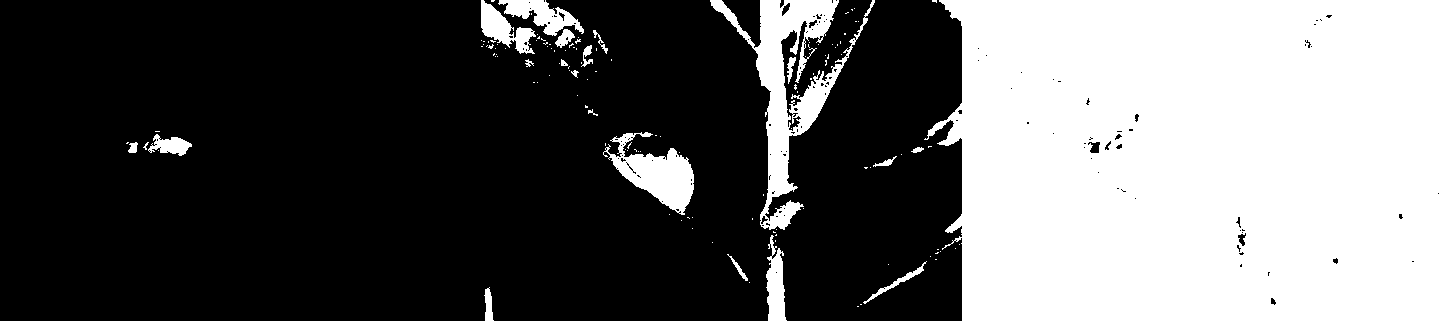

In [29]:
seg_r = rojo>150
seg_v = verde<60
seg_a = azul<80
seg_rgb = np.concatenate((seg_r,seg_v,seg_a),axis=1)
cv2_imshow(seg_rgb*255)

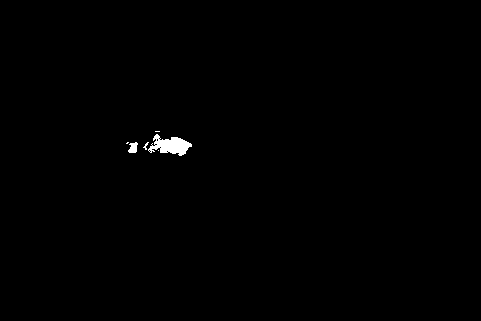

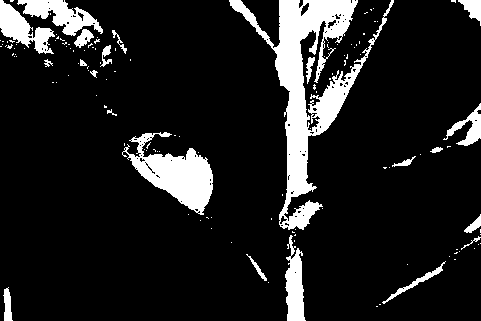

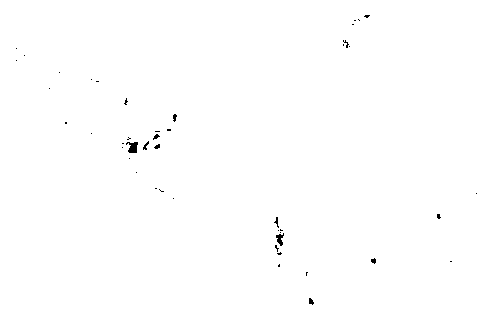

In [30]:
cv2_imshow(seg_r.astype(np.uint8) * 255)
cv2_imshow(seg_v.astype(np.uint8) * 255)
cv2_imshow(seg_a.astype(np.uint8) * 255)

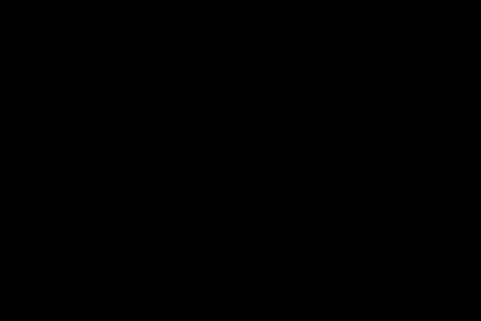

In [31]:
seg_rv = np.logical_and(seg_r,seg_v)
seg = np.logical_and(seg_rv,seg_a)
cv2_imshow(seg*255)

In [32]:
print(np.unique(seg))

[False]


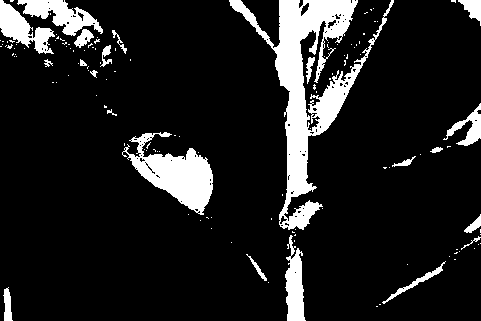

In [33]:
cv2_imshow((verde < 60).astype(np.uint8) * 255)

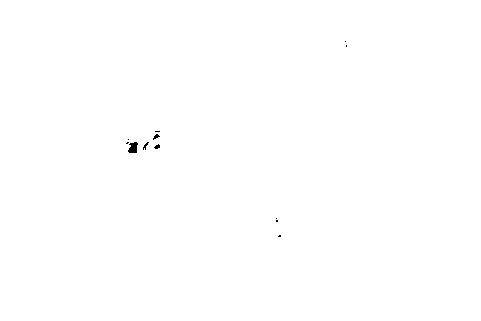

In [34]:
cv2_imshow((azul < 100).astype(np.uint8) * 255)

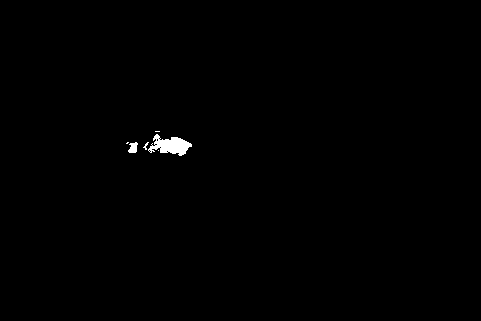

In [35]:
cv2_imshow((rojo > 150).astype(np.uint8) * 255)

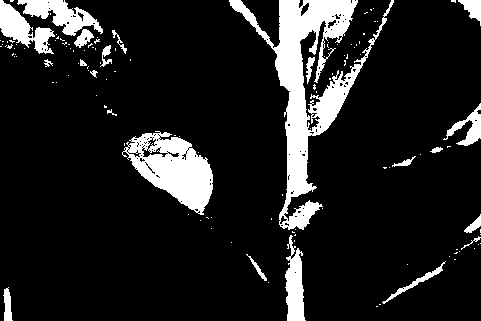

In [36]:
# Condiciones
seg_r = rojo > 150
seg_v = verde < 60

#cambio la logica de and a or
seg = np.logical_or(seg_r, seg_v)

# Mostrar la máscara
cv2_imshow(seg.astype(np.uint8) * 255)



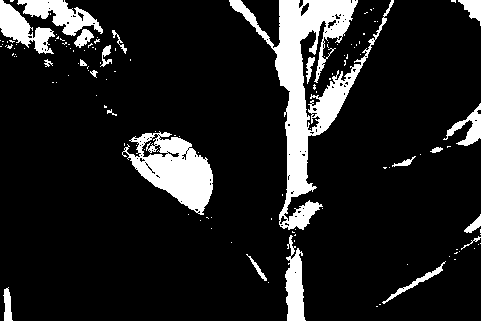

In [37]:
solo_objeto = np.logical_and(seg, azul < 130)
cv2_imshow(solo_objeto.astype(np.uint8) * 255)

Voy a probar de otra manera porque no estoy pudiendo.

In [38]:
# Umbrales para color (en formato RGB)
lower = np.array([80, 0, 0])     # Rojo mínimo, poco verde y azul
upper = np.array([150, 90, 80])   # Rojo fuerte, con algo de verde y azul

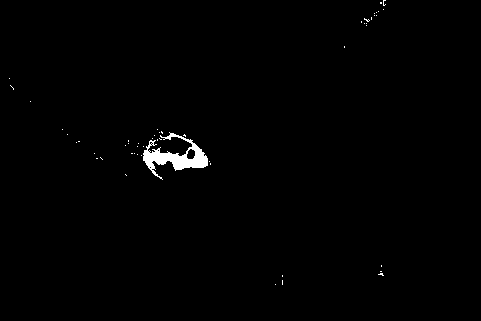

In [39]:
mask = cv2.inRange(img3_rgb, lower, upper)
cv2_imshow(mask)

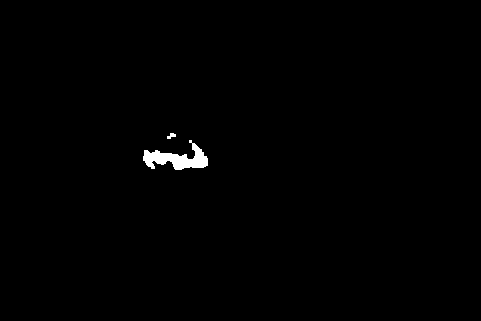

In [40]:
# Kernel de 3x3
kernel = np.ones((3, 3), np.uint8)

# Aplicar apertura (elimina puntos pequeños)
limpia = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

cv2_imshow(limpia)


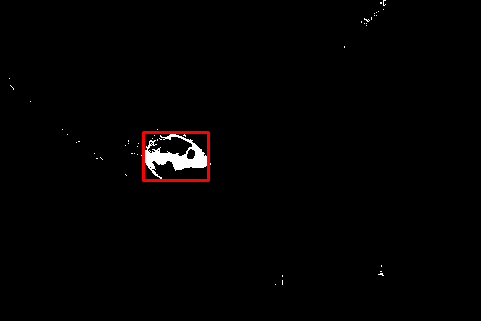

In [41]:
# Asegurate que la máscara esté en formato uint8 con valores 0 o 255
mask_uint8 = mask.astype(np.uint8)

# Buscar contornos en la máscara
contornos, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Copiar la máscara en 3 canales para poder mostrar el rectángulo en color
mask_color = cv2.cvtColor(mask_uint8, cv2.COLOR_GRAY2BGR)

# Dibujar el contorno más grande (si existe)
if contornos:
    contorno_max = max(contornos, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(contorno_max)
    cv2.rectangle(mask_color, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Rojo (BGR)
else:
    print("No se encontraron contornos.")

# Mostrar la máscara con el rectángulo
cv2_imshow(mask_color)


In [42]:
print(img3_rgb.shape)
print(mask.shape)

(321, 481, 3)
(321, 481)


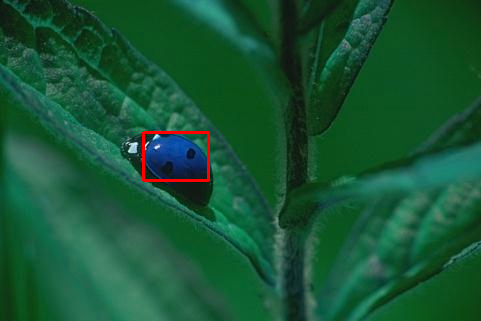

In [43]:
# Asegurarse de que la máscara esté en el formato correcto
mask_uint8 = mask.astype(np.uint8)

# Buscar contornos
contornos, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Trabajar sobre una copia de la imagen original
img_con_rect = img3_rgb.copy()

# Dibujar el rectángulo más grande
if contornos:
    contorno_max = max(contornos, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(contorno_max)
    cv2.rectangle(img_con_rect, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Verde
    cv2_imshow(img_con_rect)
else:
    print("No se encontraron contornos.")


No pude lograr marcar todo el objeto pero trate de acercame lo mas posible

In [44]:
x, y, w, h = cv2.boundingRect(contorno_max)
print(f"Coordenadas del rectángulo: x={x}, y={y}, ancho={w}, alto={h}")

Coordenadas del rectángulo: x=143, y=132, ancho=65, alto=48


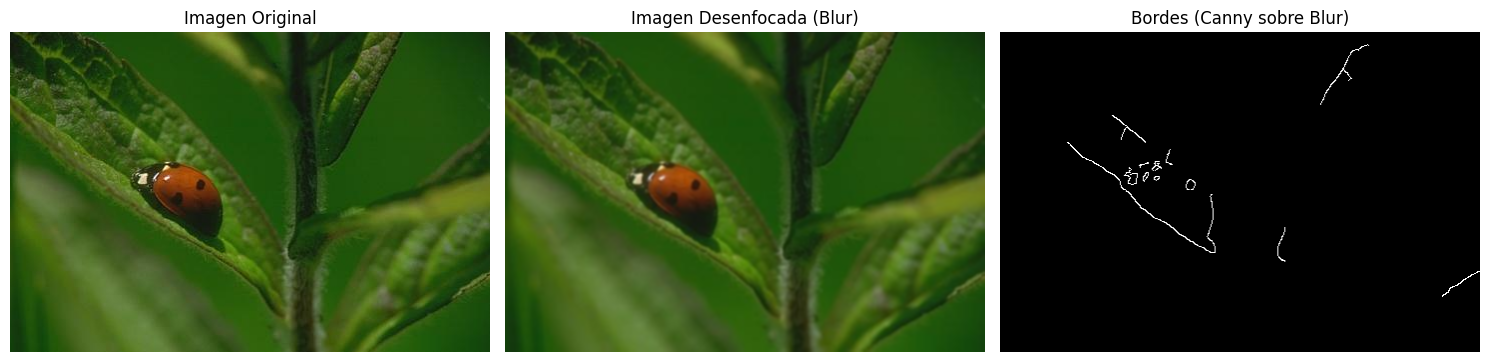

In [66]:
# Paso 1: Imagen original
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img3_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Paso 2: Aplicar desenfoque Gaussiano
img_blur_suave = cv2.GaussianBlur(img3_rgb, (5, 5), 0)

plt.subplot(1, 3, 2)
plt.imshow(img_blur_suave)
plt.title('Imagen Desenfocada (Blur)')
plt.axis('off')

# Paso 3: Convertir a escala de grises antes del Canny
img_gray = cv2.cvtColor(img_blur_suave, cv2.COLOR_RGB2GRAY)

# Paso 4: Detección de bordes con Canny
edges_suave = cv2.Canny(img_gray, 100, 200)

plt.subplot(1, 3, 3)
plt.imshow(edges_suave, cmap='gray')
plt.title('Bordes (Canny sobre Blur)')
plt.axis('off')

plt.tight_layout()
plt.show()


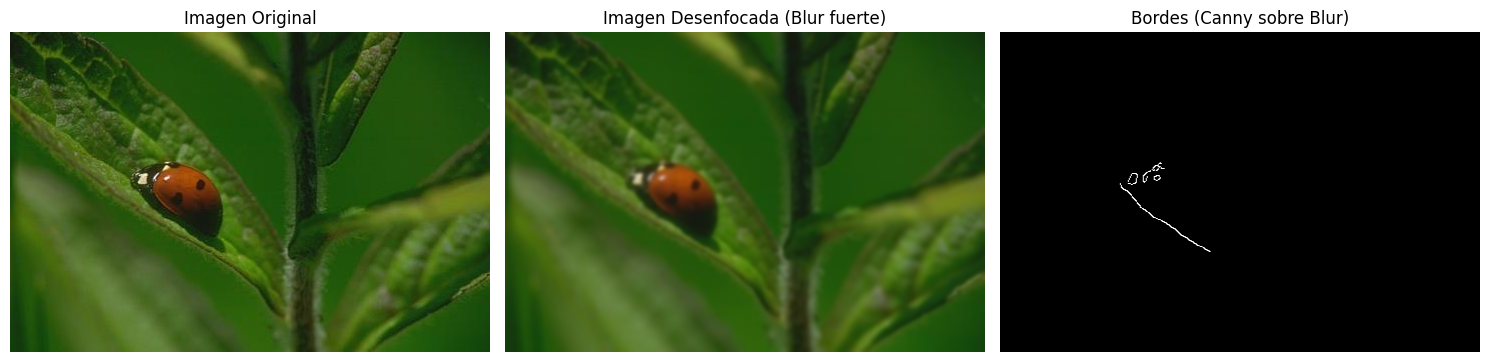

In [67]:
# Paso 1: Imagen original
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img3_rgb)
plt.title('Imagen Original')
plt.axis('off')

# Paso 2: Aplicar desenfoque Gaussiano
img_blur_fuerte = cv2.GaussianBlur(img3_rgb, (9, 9), 0)

plt.subplot(1, 3, 2)
plt.imshow(img_blur_fuerte)
plt.title('Imagen Desenfocada (Blur fuerte)')
plt.axis('off')

# Paso 3: Convertir a escala de grises antes del Canny
img_gray = cv2.cvtColor(img_blur_fuerte, cv2.COLOR_RGB2GRAY)

# Paso 4: Detección de bordes con Canny
edges_fuerte = cv2.Canny(img_gray, 100, 200)

plt.subplot(1, 3, 3)
plt.imshow(edges_fuerte, cmap='gray')
plt.title('Bordes (Canny sobre Blur)')
plt.axis('off')

plt.tight_layout()
plt.show()

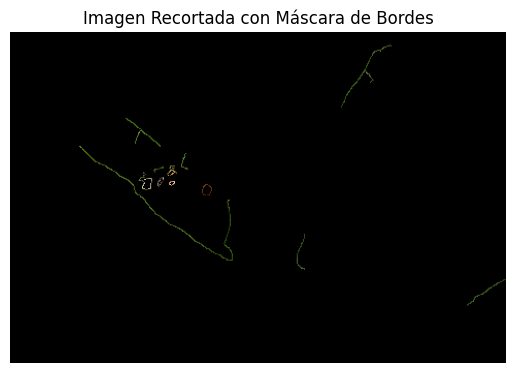

In [68]:
# Crear una máscara binaria de los bordes
mask2 = edges_suave != 0

# Aplicar la máscara a la imagen original (esto recorta la imagen)
img_cropped = cv2.bitwise_and(img3_rgb, img3_rgb, mask=mask2.astype(np.uint8))

plt.imshow(img_cropped)
plt.title('Imagen Recortada con Máscara de Bordes')
plt.axis('off')
plt.show()


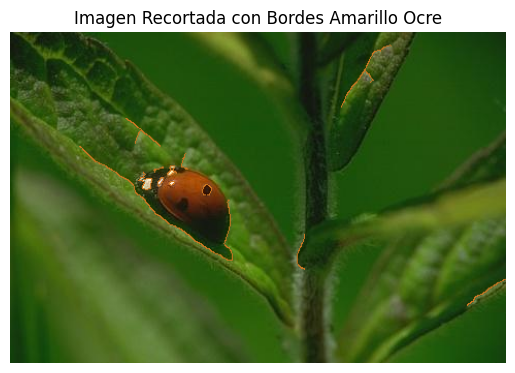

In [69]:
# Crear una máscara binaria de los bordes
mask3 = edges_suave != 0

# Crear una copia de la imagen original
img_colored = img3_rgb.copy()

# Cambiar el color de los bordes a amarillo ocre (RGB: 204, 119, 34)
img_colored[mask3] = [204, 119, 34]  # Amarillo ocre

# Mostrar la imagen con los bordes coloreados
plt.imshow(img_colored)
plt.title('Imagen Recortada con Bordes Amarillo Ocre')
plt.axis('off')
plt.show()
